In [10]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [11]:
# Store the data into a data frame
df = pd.read_csv('NFLX_stock3.csv')
df.head()

,date,Open Price,High Price,Low Price,Close Price,Adj Close Price
0,12/23/2020,398.36,421.78,413.53,427.43,51904.63
1,12/24/2020,431.09,425.26,430.21,434.98,65842.39
2,12/25/2020,408.09,430.19,405.90,425.64,51157.53
3,12/26/2020,439.14,417.56,430.11,441.26,58966.92
4,12/27/2020,408.73,446.05,411.98,402.60,60425.13


In [12]:
# Get the number of the trading days
df.shape

(250, 6)

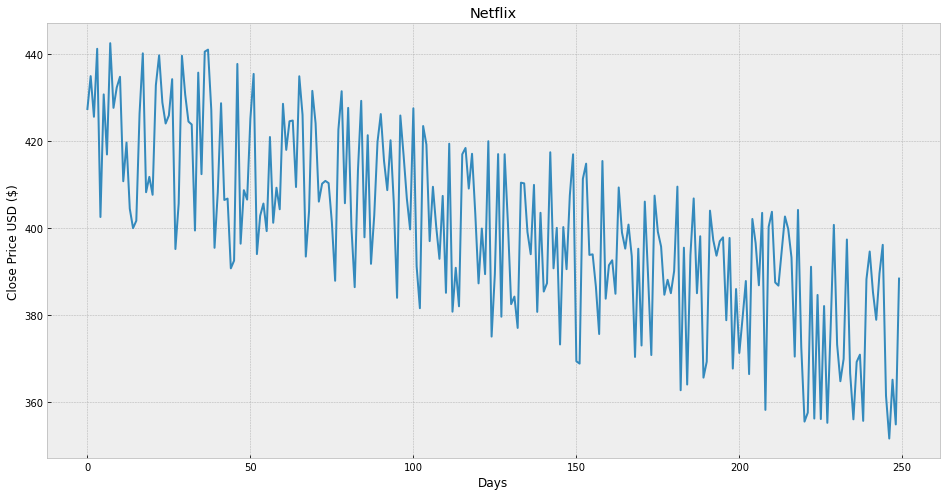

In [13]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

In [14]:
# Get the close price
df = df[['Close Price']]
df.head()

,Close Price
0,427.43
1,434.98
2,425.64
3,441.26
4,402.60


In [15]:
# Create a Variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close Price']].shift(-future_days)
df.tail()

,Close Price,Prediction
245,361.54,NaN
246,351.69,NaN
247,365.21,NaN
248,354.93,NaN
249,388.45,NaN


In [16]:
# Create the feature data set (X)
# Convert it to a numpy  array
# remove the last 'X' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[427.43]
 [434.98]
 [425.64]
 [441.26]
 [402.6 ]
 [430.78]
 [416.97]
 [442.55]
 [427.69]
 [432.37]
 [434.83]
 [410.82]
 [419.72]
 [404.5 ]
 [400.04]
 [401.75]
 [426.38]
 [440.22]
 [408.3 ]
 [411.83]
 [407.71]
 [432.89]
 [439.76]
 [428.91]
 [424.09]
 [425.95]
 [434.28]
 [395.24]
 [405.69]
 [439.65]
 [430.75]
 [424.54]
 [423.86]
 [399.5 ]
 [435.78]
 [412.45]
 [440.6 ]
 [441.07]
 [427.28]
 [395.52]
 [408.36]
 [428.75]
 [406.52]
 [406.83]
 [390.8 ]
 [392.58]
 [437.78]
 [396.47]
 [408.77]
 [406.6 ]
 [425.23]
 [435.49]
 [394.08]
 [402.89]
 [405.7 ]
 [399.36]
 [420.99]
 [401.28]
 [409.33]
 [404.38]
 [428.62]
 [418.03]
 [424.61]
 [424.78]
 [409.49]
 [434.95]
 [426.08]
 [393.51]
 [403.97]
 [431.59]
 [424.16]
 [406.14]
 [410.26]
 [410.9 ]
 [410.39]
 [401.35]
 [387.95]
 [422.7 ]
 [431.51]
 [405.77]
 [427.68]
 [400.25]
 [386.48]
 [413.3 ]
 [429.3 ]
 [397.94]
 [421.4 ]
 [391.84]
 [403.01]
 [419.87]
 [426.26]
 [415.48]
 [408.78]
 [420.24]
 [405.83]
 [384.03]
 [425.93]
 [416.81]
 [406.84]
 [399.76]


In [17]:
# Create the target data  set (y)
# Convert it to a numpy arry
# Get all of the target values except the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
y

array([425.95, 434.28, 395.24, 405.69, 439.65, 430.75, 424.54, 423.86,
       399.5 , 435.78, 412.45, 440.6 , 441.07, 427.28, 395.52, 408.36,
       428.75, 406.52, 406.83, 390.8 , 392.58, 437.78, 396.47, 408.77,
       406.6 , 425.23, 435.49, 394.08, 402.89, 405.7 , 399.36, 420.99,
       401.28, 409.33, 404.38, 428.62, 418.03, 424.61, 424.78, 409.49,
       434.95, 426.08, 393.51, 403.97, 431.59, 424.16, 406.14, 410.26,
       410.9 , 410.39, 401.35, 387.95, 422.7 , 431.51, 405.77, 427.68,
       400.25, 386.48, 413.3 , 429.3 , 397.94, 421.4 , 391.84, 403.01,
       419.87, 426.26, 415.48, 408.78, 420.24, 405.83, 384.03, 425.93,
       416.81, 406.84, 399.76, 427.58, 391.31, 381.64, 423.51, 419.26,
       397.06, 409.55, 400.44, 392.99, 407.45, 385.18, 419.45, 380.84,
       390.93, 382.08, 417.02, 418.47, 409.14, 417.13, 403.3 , 387.35,
       399.95, 389.47, 420.02, 375.12, 389.48, 417.06, 379.69, 417.03,
       401.25, 382.58, 384.31, 377.11, 410.49, 410.33, 399.15, 394.05,
      

In [18]:
# Split the data into 75%training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [19]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [20]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[371.35],
       [379.44],
       [387.89],
       [366.5 ],
       [402.15],
       [396.61],
       [386.91],
       [403.55],
       [358.27],
       [400.36],
       [403.8 ],
       [387.57],
       [386.83],
       [394.77],
       [402.72],
       [399.84],
       [393.3 ],
       [370.52],
       [404.23],
       [372.76],
       [355.58],
       [357.64],
       [391.17],
       [356.28],
       [384.69]])

In [21]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[356.17 382.14 355.3  376.71 400.79 373.32 370.97 369.99 397.43 377.11
 356.1  369.3  370.97 355.75 388.29 375.12 385.32 393.71 389.64 396.21
 361.54 397.43 365.21 361.54 388.45]

[382.77650293 386.68279542 390.76291551 380.43465886 397.64841994
 394.9734063  390.28971815 398.32441617 376.46076675 396.78411048
 398.44512978 390.60840208 390.25108979 394.08495411 397.92364698
 396.53302617 393.37515807 382.37573374 398.65275719 383.4573277
 375.16188828 376.15656844 392.3466781  375.49988639 389.21778127]


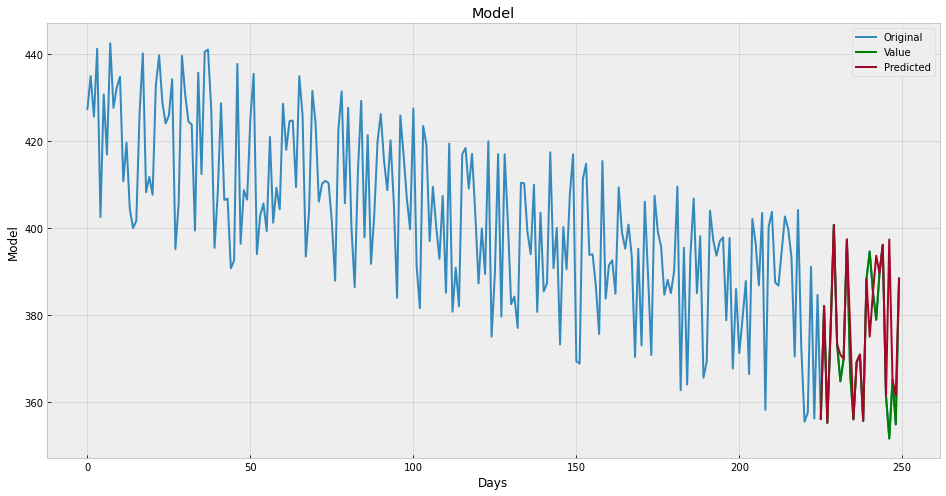

In [22]:
#Visualize the data
predictions =tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Model')
plt.plot(df['Close Price'])
plt.plot(valid[ 'Close Price'], color="green")
plt.plot(valid[ 'Predictions'])

plt.legend(['Original', 'Value', 'Predicted'])
plt.show()

# Plotly and Cufflinks

In [23]:
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.14.1


visualize the data

In [24]:
# For Notebooks
init_notebook_mode(connected=True)

In [25]:
# For offline use
cf.go_offline()

In [64]:
dataset= pd.read_csv('NFLX_stock3.csv')
# Set the date as the Index for the data
dataset = dataset.set_index(pd.DatetimeIndex(dataset["date"].values))
dataset.head()

In [59]:
dataset.iplot(kind='scatter',x='date',y='Adj Close Price',size=15)

In [92]:
dataset['Adj Close Price'].iplot(kind='hist',bins=35)

In [93]:
dataset.scatter_matrix()